# plot maps of oxygen change

In [1]:
%matplotlib inline
from config_calc import *

import matplotlib
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'

import cmocean
import plot_tools
import proc_cesm_le

### read the CESM-LE data

In [2]:
%%time
tr85 = proc_cesm_le.open_ens('tr85','ann_dft_tanm',['O2'],
                             isel={'time':-1})
baseline = proc_cesm_le.open_ens('tr85','ann_dft_tavg_1920-1939',['O2'])
print tr85
print baseline

<xarray.Dataset>
Dimensions:   (ens: 33, nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: ens, nlat, nlon
Data variables:
    O2        (ens, z_t, nlat, nlon) float32 nan nan nan nan nan nan nan nan ...
    year      float64 170.5
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    U

<xarray.Dataset>
Dimensions:   (ens: 33, nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: ens, nlat, nlon
Data variables:
    O2        (ens, z_t, nlat, nlon) float32 nan nan nan nan nan nan nan nan ...
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG     (nlat, nlon) float6

### compute thermocline averages

In [3]:
zwgt = tr85.dz.sel(z_t=slice(200e2,600e2)) / tr85.dz.sel(z_t=slice(200e2,600e2)).sum()
print zwgt
print zwgt.values.sum()

<xarray.DataArray 'dz' (z_t: 15)>
dask.array<div, shape=(15,), dtype=float64, chunksize=(15,)>
Coordinates:
  * z_t      (z_t) float64 2.097e+04 2.226e+04 2.364e+04 2.514e+04 2.677e+04 ...
1.0


In [4]:
kmin = np.where(tr85.z_t.sel(z_t=slice(200e2,600e2))[0] == tr85.z_t)[0][0]
kmax = np.where(tr85.z_t.sel(z_t=slice(200e2,600e2))[-1] == tr85.z_t)[0][0]
kmin, kmax

(20, 34)

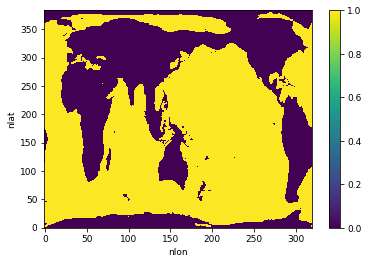

In [5]:
zmask = xr.DataArray(np.ones((len(tr85.nlat),len(tr85.nlon))),dims=('nlat','nlon'))
zmask = zmask.where((tr85.KMT-1>=kmax)).fillna(0.)
zmask.plot()

In [6]:
tr85_tc = (tr85*zwgt*zmask).sum(dim='z_t')
baseline_tc = (baseline*zwgt*zmask).sum(dim='z_t')
print tr85_tc
print baseline_tc

<xarray.Dataset>
Dimensions:   (ens: 33, nlat: 384, nlon: 320, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: ens, nlat, nlon
Data variables:
    O2        (ens, nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    year      (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TLAT      (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TLONG     (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    UAREA     (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    ULAT      (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    ULONG     (nlat, nlon) float64 0.0 0.0 0.0 0

<xarray.Dataset>
Dimensions:   (ens: 33, nlat: 384, nlon: 320, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: ens, nlat, nlon
Data variables:
    O2        (ens, nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TLAT      (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TLONG     (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    UAREA     (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    ULAT      (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    ULONG     (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    dz        (nlat, nlon) float64 0.0 0.0 0.0 0

/glade/p/work/mclong/miniconda2/lib/python2.7/site-packages/dask/core.py:306: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif type_arg is type(key) and arg == key:


### compute ensemble mean

In [7]:
%%time
tr85a = tr85_tc.mean(dim='ens')
baselinea = baseline_tc.mean(dim='ens')
print tr85a

<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    O2        (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    year      (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TLAT      (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TLONG     (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    UAREA     (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    ULAT      (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    ULONG     (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

compute to avoid memory issues with many files open

In [8]:
%%time
tr85a = tr85a.compute()
baselinea = baselinea.compute()

CPU times: user 3.58 s, sys: 2.44 s, total: 6.02 s
Wall time: 14.2 s


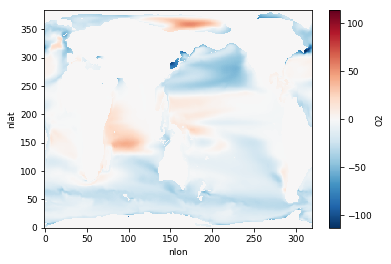

In [9]:
tr85a.O2.plot()

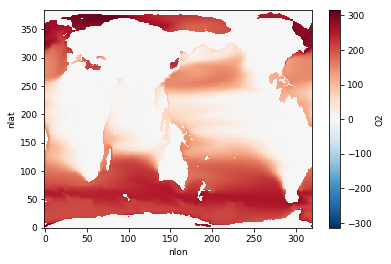

In [10]:
baselinea.O2.plot()

In [11]:
LON = [[]]*2
LAT = [[]]*2
Z = [[]]*2
lon = tr85.TLONG.values
lat = tr85.TLAT.values
field = tr85a.O2.values
LON[1],LAT[1],Z[1]= plot_tools.adjust_pop_grid(lon,lat,field)

lon = tr85.TLONG.values
lat = tr85.TLAT.values
field = baselinea.O2.values
LON[0],LAT[0],Z[0]= plot_tools.adjust_pop_grid(lon,lat,field)


for lon,lat,z in zip(LON,LAT,Z):
    print z.shape
    print lon.shape
    print lat.shape

(384, 321)
(384, 321)
(384, 321)
(384, 321)
(384, 321)
(384, 321)


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


/glade/p/work/mclong/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


initial plot size (display units): 6.98,3.54
Adjusting fig size:
	(W,H in): 10.00,4.00 --> 8.03,6.73
new plot size: 5.61,3.57


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


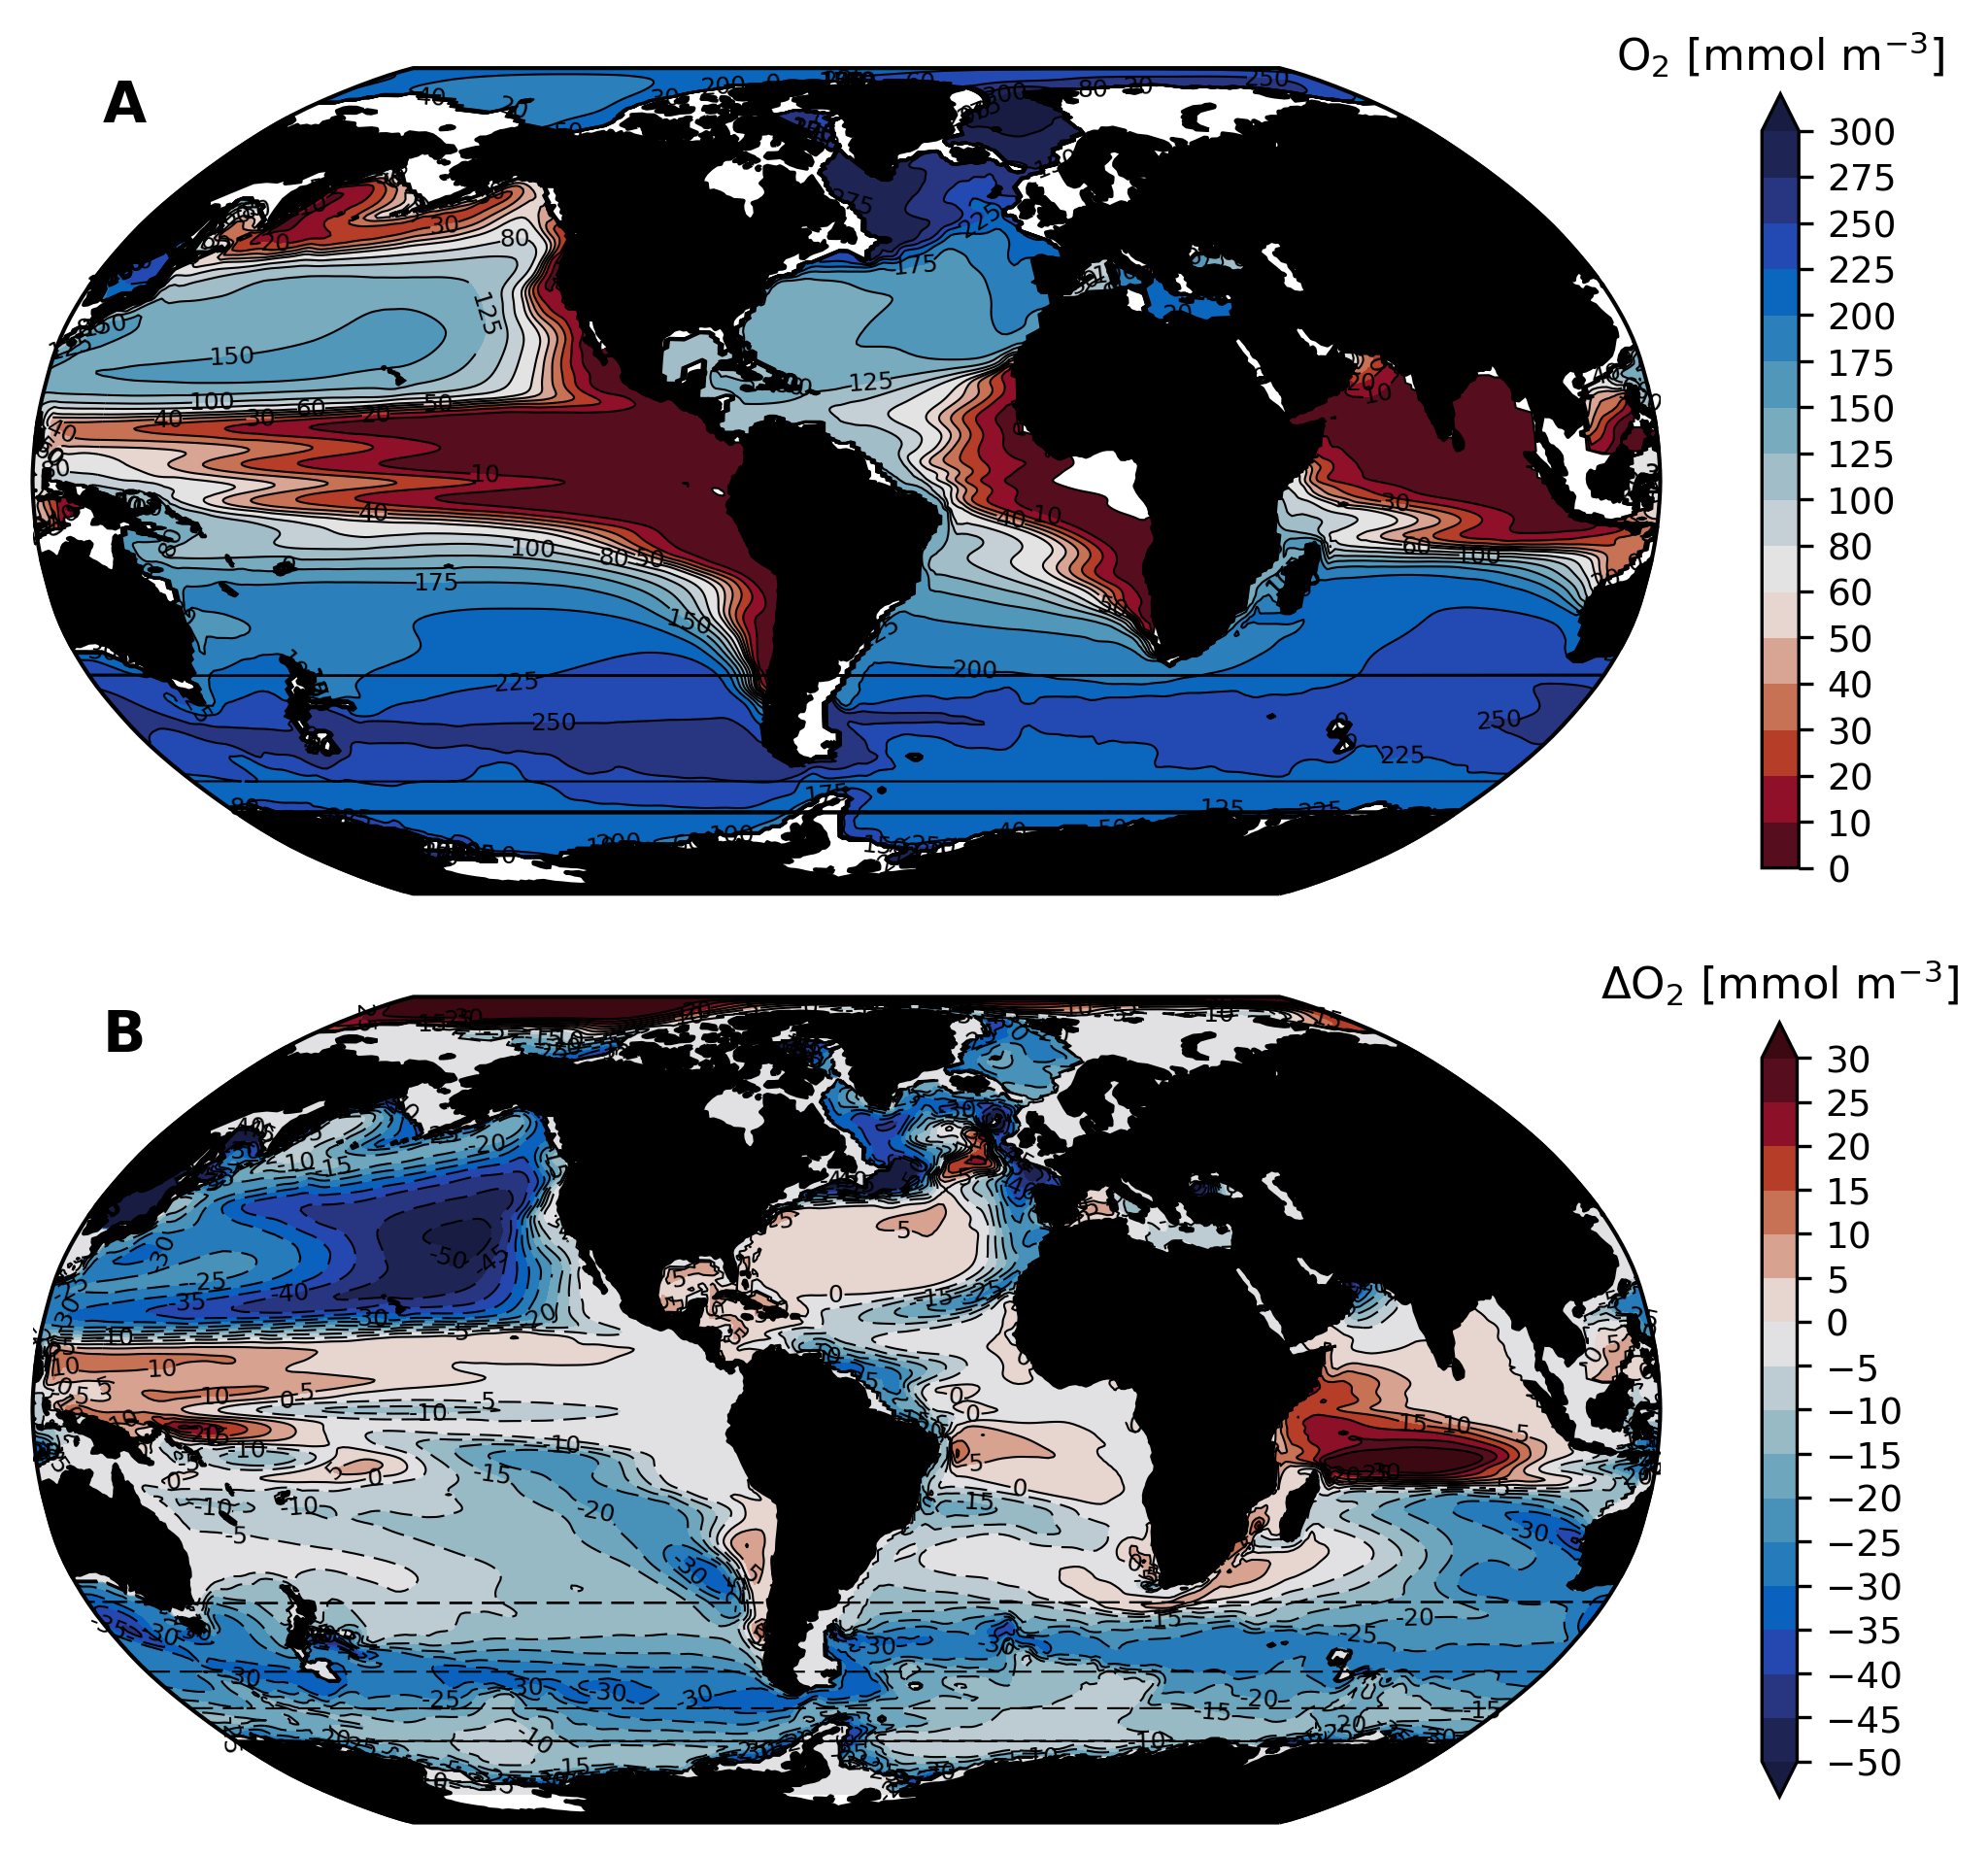

In [12]:
plot_name = os.path.join(diro['fig'],'cesm-thermocline-o2-change.pdf')

matplotlib.rcParams['contour.negative_linestyle'] = 'dashed'

fig=plt.figure(figsize=(10, 4),dpi=300)
gs = gridspec.GridSpec(2,1)


obj = [[]]*2
ax = []
for i,(lon,lat,z) in enumerate(zip(LON,LAT,Z)):

    if i == 0:
        levels = np.arange(-2.,34.,2.)
        units = 'O$_2$ [mmol m$^{-3}$]'
        norm = plot_tools.MidPointNorm(midpoint=60.)
        contour_specs = {'levels':[0,10,20,30,40,50,60,80,100,125,150,175,200,225,250,275,300],
                            'cmap':cmocean.cm.balance_r,
                            'norm':norm,'extend':'max'}
    else:
        levels = np.arange(-50.,35.,5)
        norm = plot_tools.MidPointNorm(midpoint=0)
        units = '$\Delta$O$_2$ [mmol m$^{-3}$]'
        contour_specs = {'levels':levels,'cmap':cmocean.cm.balance,'norm':norm,'extend':'both'}
          
    obj[i] = plot_tools.canvas_map_contour_overlay(lon,lat,z,
                                                   contour_specs,
                                                   units = units,
                                                   fig=fig,
                                                   gridspec=gs,
                                                   row=i,col=0)
    ax.append(obj[i]['ax'])

gridspec_kwargs = {'hspace' : -0.1,
                   'wspace' : 0.05,
                   'left' : 0.,
                   'right' : 0.87,
                   'bottom' : 0.,
                   'top' : 1.}
fgsz = plot_tools.plotgrid(fig, gs, ax, [2,1],gridspec_kwargs)

alp = [chr(i).upper() for i in range(97,97+26)]
for i,axi in enumerate(ax):
    p = axi.get_position()
    y = p.y1-0.08
    fig.text(0.03,y,'%s'%alp[i],
             fontsize=14.,
             fontweight = 'semibold')
plt.savefig(plot_name,dpi=300,bbox_inches='tight')